# Taxi Game with Gymnasium

Authors : Yana RAGOZINA - Thomas PAUL

In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt


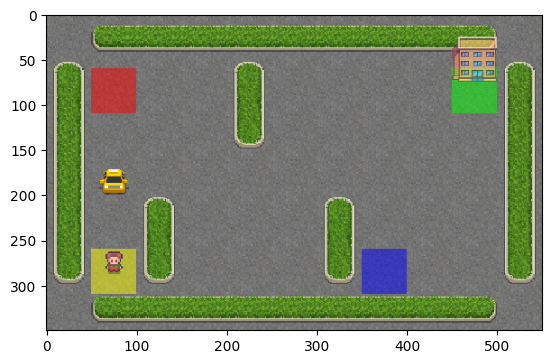

In [2]:
env = gym.make('Taxi-v3', render_mode="rgb_array")
env.reset()
plt.imshow(env.render())

In [3]:
state_space = env.observation_space.n
print("State space :", state_space)

action_space = env.action_space.n
print("Action space :", action_space)

qtable = np.zeros((state_space, action_space))
print("Q-table shape :", qtable.shape)

State space : 500
Action space : 6
Q-table shape : (500, 6)


In [4]:
# Hyper-parameters
epsilon = 1.0 # exploration first

epsilon_min = 0.005

epsilon_decay = 0.99993

episodes = 50000

max_steps = 100

learning_rate = 0.65

gamma = 0.65

In [5]:
value = qtable[5, 5]
print(value)

0.0


In [6]:
for episode in range(episodes):
    state = env.reset()[0] #resets game before every episode
    done = False
    score = 0

    for _ in range(max_steps):

        # Take the best action in the Q-table
        if random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state, :])
        # Take a random action
        else:
            action = env.action_space.sample()

        next_state, reward, done, _, _ = env.step(action)
        
        score += reward

        qtable[state, action] = (1 - learning_rate) * qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[next_state, :]))

        state = next_state

        if done:
            break
    
    if epsilon >= epsilon_min:
        epsilon *= epsilon_decay